In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [3]:
#Lettura dei dati e creazione dei dataframe per i giocatori, i tornei e i match ATP dal 1968 al 2024 
atp_matches = pd.read_csv('Data/atpdata/atp_matches.csv')
atp_players = pd.read_csv('Data/atpdata/atp_players.csv')
atp_rankings = pd.read_csv('Data/atpdata/atp_rankings.csv', low_memory=False);

#Pallet di colori per i grafici
colors = ['#11565c', '#007660', '#459146', '#9aa414', '#ffa600' ]


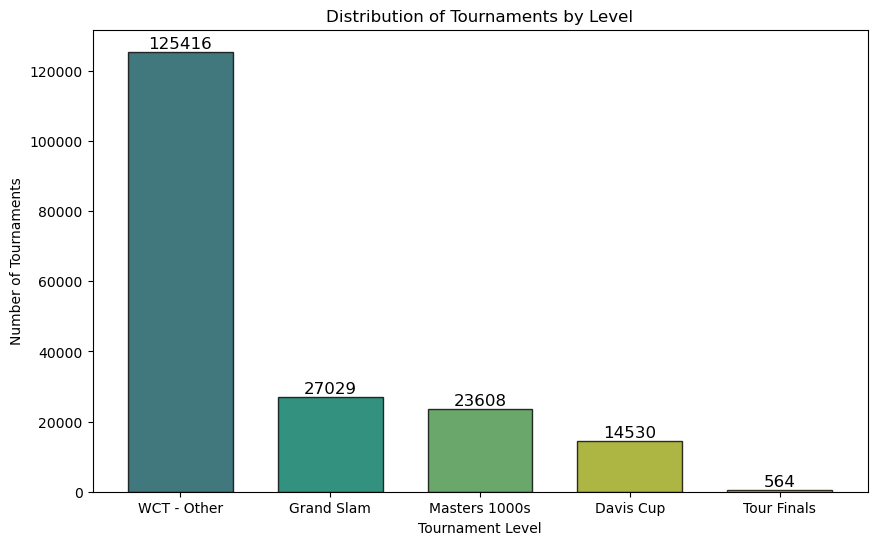

In [31]:

#Numero di tornei per livello

tournament_counts = atp_matches['tourney_level'].value_counts()
tournament_counts = tournament_counts.rename(index={'C': 'Challengers', 'G': 'Grand Slam', 'D': 'Davis Cup', 'F': 'Tour Finals', 'M': 'Masters 1000s', 'A': 'WCT - Other', 'S': 'Satellites/ITFs'})
plt.figure(figsize=(10, 6))
plt.bar(tournament_counts.index, tournament_counts, color=colors, edgecolor='black', alpha=0.8, align='center', width=0.7)
#add total number of tournaments
for i, count in enumerate(tournament_counts):
    plt.text(i, count+10, count, ha='center', va='bottom', fontsize=12)
plt.title('Distribution of Tournaments by Level')
plt.xlabel('Tournament Level')
plt.ylabel('Number of Tournaments')
plt.show()

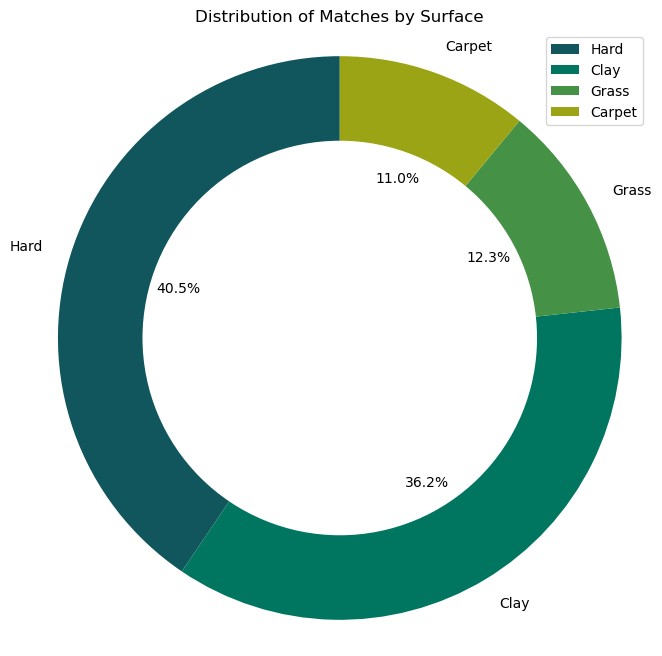

In [5]:
#Numero di tornei per superficie
surface_counts = atp_matches['surface'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(surface_counts, labels=surface_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)
ax.set_title('Distribution of Matches by Surface')
ax.axis('equal')
ax.legend(wedges, surface_counts.index, loc='best')
plt.show()


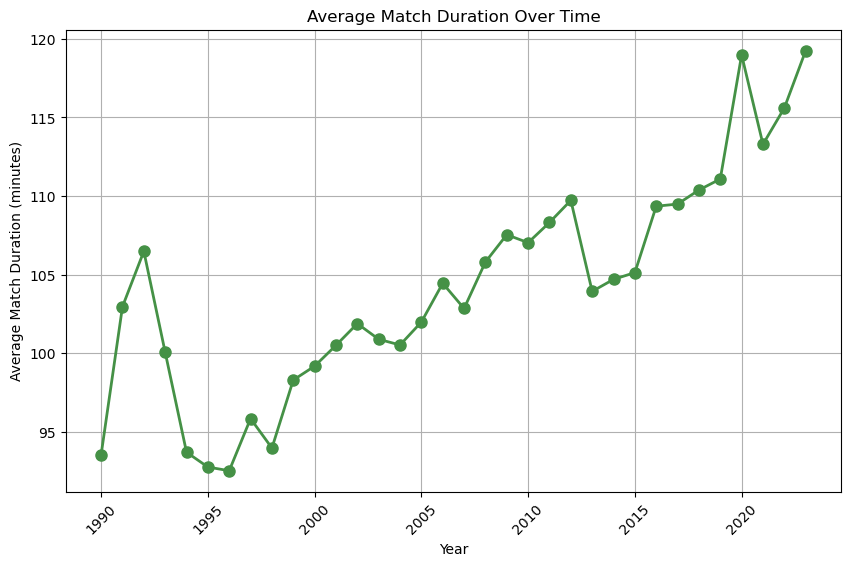

In [34]:
#Numero di match per anno

atp_matches['year'] = pd.to_datetime(atp_matches['tourney_date'], format='%Y%m%d').dt.year
atp_matches_filtered = atp_matches[atp_matches['year'] >= 1990]
average_duration = atp_matches_filtered.groupby('year')['minutes'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_duration.index, average_duration, marker='o', linestyle='-', color=colors[2], linewidth=2, markersize=8)
plt.xlabel('Year')
plt.ylabel('Average Match Duration (minutes)')
plt.title('Average Match Duration Over Time')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()





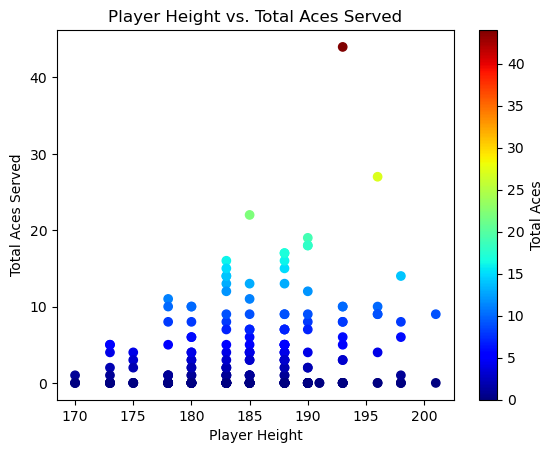

In [7]:
#Altezza dei giocatori e numero di ace

subset_matches = atp_matches.sample(n=150)
winner_aces = subset_matches.groupby('winner_id')['w_ace'].sum()
loser_aces = subset_matches.groupby('loser_id')['l_ace'].sum()
total_aces = winner_aces.add(loser_aces, fill_value=0)
player_data = pd.merge(atp_players[['player_id', 'height']], total_aces.rename('total_aces'), left_on='player_id', right_index=True)
plt.scatter(player_data['height'], player_data['total_aces'], c=player_data['total_aces'], cmap=cm.jet)
plt.xlabel('Player Height')
plt.ylabel('Total Aces Served')
plt.title('Player Height vs. Total Aces Served')
plt.colorbar(label='Total Aces')
plt.show()
